# Unsupervised Analysis Report

## 1. Introduction
After analyzing a 72-question survey to computer users, Apple wants to identify behavioral trends and possible new customers to tailor their campaigns correctly and modify their strategy to a focalized group. For that, our team developed an unsupervised machine learning model, using PCA analysis and clustering, to identify customers' groups based on their personalities and leadership skills.

## 2. Personality
After analyzing the clusters' final correlation, we created different threats (PCA) related to the big five personalities. We labeled them as professions we consider are aligned to the personas: Old-school Mathematician, Solo-Artist Musician, Scientist, and Marketers. Finally, after running the model, we identified five different groups of customers:

Cluster 1: People that are extrovert, easy-going, creative, and energetic. Good at critical thinking and rationality.

Cluster 2: Smart people, full of creative ideas but also introverted and mysterious. Usually, they tend to overthink and pay attention to details.

Cluster 3: Emotional and self-centric, but also out-going. They tend to irritate easily and change moods frequently. Messy and clueless.

Cluster 4: Extremely introverted and perfectionist but also not good at developing excellent and complex ideas.

Cluster 5: Usually people that are traditional and unimaginative. They don't like too much social interaction and are usually quiet but not in the extreme.

We found these insights related to the demographic survey information and their purchase behavior for these personas:

- Old School Mathematician: The Cluster 5 (green) has the strongest tendency to switch their Macbook to Windows. Analyzing in depth according to their program in Hult Business School, they are present in the BA program, above average compared to the other clusters. Therefore, targeting this cluster, safely saying gender or age independently, can retain customers. On the other hand, Cluster 4 (blue) is switching to Macbook, coming from all over the world, except Africa, and less representative in North America. An actionable recommendation is focusing on student discounts. Considering that this is happening with the same price point for both brands, an increase in students' discount could keep them as customers and switch Windows users to Apple. 

- Solo-Musician: The Cluster 5 (green) also has the strongest tendency to switch their Macbook to Windows. But in that case, customers from 18-25 years old have the mean higher than other age ranges. Therefore, this message should be target at this group. The use of KOL's (Key Opinion Leaders) for millennials is the better recommendation for this target audience. Remembering that they don't like too much social interaction, therefore the message should avoid gatherings. 
        
- Scientist: A relative tendency to be a Scientist moving from Windows to Macbook, Cluster 4 (blue), located in Europe, is above average compared to other clusters and continents. Understanding their behavior like perfectionist and introvert, the suggested actionable recommendation is creating a Social Media campaign with symmetrical and clean elements, targeting people in Europe, independently their age and education. 

- For the Marketeer PCA, we found that for Cluster 5, this trait is stronger between the ages of 18 to 25. Also, considering Cluster 5, we identified that the group who tends to continue using Macbooks has a stronger marketeer trait than those who are more willing to switch to Windows computers. With that said, when we identify a Marketeer trait for Cluster 5 group, we can consider those as loyal customers. An actionable recommendation is to enhance the "Lock-in effect" to avoid losing trustworthy customers.

## 3. Leadership (Hult DNA)
Same as before, After analyzing the clusters' final correlation, we created different threats (PCA) related to the Hult DNA leadership skills (Thinking, Communicating, and Team Building). In this case, we identified two particular features based on similar personalities and skills and labeled them as personas: Old-school boss and Elon Musk. After running the model, we choose to have three different groups of customers:

Cluster 1: Good idea sellers, creative, and ease in developing complex ideas, but they don't listen carefully to teammates either build relationships with others.

Cluster 2: People with a lack of leadership skills, not listening to others, not good at working in a team, and cannot develop complex ideas.

Cluster 3: People with good leadership skills, usually take the initiative, with a growth mindset, and resolve conflicts with others.

We found these insights related to the demographic survey information and their purchase behavior:

- Customers with a lack of leadership skills categorized as Cluster 2, with stronger "Old-School Boss" tendency are most likely to change from Mac to Windows, therefore considered "lost customers." Even though they are just 5% of the population, they had a well defined and strong categorization. A lousy leadership attitude may lead to demotivation and consequently low Retention. So for them, the selling strategy should focus on a retention campaign that involves improving customer service, good communication with customers, and personalized offers. We also identified a stronger trait for this behavior for South Americans compared to other Nationalities

- Apple users are more similar to Elon musk, smart, and confident. Customers with good leadership and mindset are also more tended to switch from Windows to Apple. This trait is more apparent in the younger group under 25 and students from Asia, Europe, and Africa. However, the survey is biased as those who are admitted and affordable to Hult. Thus, we may conclude that Apple should put more focus on the market with higher-level education facilities, primarily business-related colleges with sources from Asia, Europe, and Africa. A potential actionable plan could be better to communicate their Education Pricing program (ConnectED) or increase student discount.

## 4. Conclusion

Based on the survey data, we ran a PCA analysis to identify different behaviors and grouping them into clusters and personas. The result explained above was useful to develop the campaign strategy either for Retention, like the "Lock-in effect" strategy and Customer Acquisition, using digital campaigns and influencers, to reach the right target audience for Apple. Data-driven decision-making can create an advantage. In this competitive market, where 5% of the customers can make the difference, it is essential to analyze the consumer buying behavior to succeed.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Unsupervised Analysis code

## 1. Data Preparation / Data clean up
### 1.1 Importing & define codes

In [93]:
########################################
# Importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('survey_data.xlsx')

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [94]:
# Defining methods:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

### 1.2 Rename each columns

In [49]:
# hanging name of the columns
survey_df.columns=[ 'surveyID',                   # drop
                    'q1_life_party',              # reverse q16
                    'q2_little_concern_others',   # same q22, negative(may translate)
                    'q3_always_prepared',         #  
                    'q4_stressed_easily',         # reverse q9
                    'q5_rich_vocabulary',         # same q40
                    'q6_dont_talk',               # same q26, negative(may translate)
                    'q7_interested_people',       # reverse q32
                    'q8_leave_belongings',        # same q28, negative(may translate)
                    'q9_relaxed_most_time',       # q4, translate as "6-x", then drop
                    'q10_difficult_abstract',     # same q20
                    'q11_comfortable_people',     #
                    'q12_insult_people',          # q47, translate as "6-x", then drop
                    'q13_attention_details',      #
                    'q14_worry_things',           #
                    'q15_vivid_imagination',      # reverse q30
                    'q16_keep_background',        # q1, translate as "6-x", then drop
                    'q17_sympathize_others',      # same q42
                    'q18_make_mess',              # q33, translate as "6-x", then drop
                    'q19_not_feel_blue',          # q49, translate as "6-x", then drop
                    'q20_not_abrastract_ideas',   # no need translate q10
                    'q21_start_conversations',    # 
                    'q22_not_people_problems',    # no need translate q2
                    'q23_chores_done',            #
                    'q24_easily_disturbed',       # same q44, negative(may translate)
                    'q25_excellent_ideas',        #
                    'q26_little_to_say',          # no need translate q6 negative(may translate)
                    'q27_soft_heart',             # 
                    'q28_forget_things_back',     # no need translate
                    'q29_upset_easily',           # same q49, reverse q19
                    'q30_not_good_imagination',   # translate as "6-x", then drop
                    'q31_talk_in_party',          # reverse q46
                    'q32_not_interested_others',  # q7, translate as "6-x", then drop
                    'q33_like_order',             # reverse q18
                    'q34_change_mood',            # same q39
                    'q35_quick_understand',       #
                    'q36_not_attention_myself',   # q41 translate as "6-x", then drop 
                    'q37_time_others',            #
                    'q38_shirk_duties',           # q48 translate as "6-x", then drop
                    'q39_mood_swings',            # no need translate q34
                    'q40_difficult_words',        # no need translate q5
                    'q41_center_attention',       # reverse q36
                    'q42_feel_other_emotions',    # no need translate q17
                    'q43_follow_schedule',        #
                    'q44_irritated_easily',       # no need translate q24
                    'q45_reflecting_things',      #
                    'q46_quiet_strangers',        # q31, translate as "6-x", then drop
                    'q47_make_people_ease',       # reverse q12
                    'q48_exacting_work',          # reverse q38
                    'q49_feel_blue',              # no need translate q29
                    'q50_full_ideas',             #
                    'h1_patterns_complex_situations',
                    'h2_dont_generate_new_ideas',
                    'h3_demonstrate_awareness',
                    'h4_growth_mindset',
                    'h5_respond_priorities',      # duplicate h8
                    'h6_take initiative',         # duplicate h9
                    'h7_encourage_discussions',   # duplicate h10
                    'h8_respond_priorities',      # drop   
                    'h9_take_initiative',         # drop
                    'h10_encourage_discussions',  # drop
                    'h11_listen_carefully',
                    'h12_dont_sell_idea',
                    'h13_build_relationships',
                    'h14_work_diverse_cultures',
                    'h15_negotiate_interests',
                    'h16_cant_rally_people',
                    'h17_translate_ideas_plans',
                    'h18_resolve_conflicts',
                    'h19_use_feedback',
                    'h20_coach_teanmates',
                    'h21_drive_results',
                    'current_laptop',
                    'next_laptop',
                    'program',
                    'age',
                    'gender',
                    'nationality',
                    'ethnicity']

In [50]:
#drop 'surveyID' column
survey_df.drop('surveyID',axis=1, inplace=True)

### 1.3 Identify random survey observations

In [51]:
#control set identify
same_set    = [['q2_little_concern_others','q22_not_people_problems'],
               ['q5_rich_vocabulary','q40_difficult_words'],
               ['q6_dont_talk','q26_little_to_say'],
               ['q8_leave_belongings','q28_forget_things_back'],
               ['q10_difficult_abstract','q20_not_abrastract_ideas'],
               ['q17_sympathize_others','q42_feel_other_emotions'],
               ['q24_easily_disturbed','q44_irritated_easily'], 
               ['q34_change_mood', 'q39_mood_swings']]

reverse_set = [['q1_life_party','q16_keep_background'],
               ['q4_stressed_easily','q9_relaxed_most_time'],
               ['q7_interested_people','q32_not_interested_others'],
               ['q15_vivid_imagination','q30_not_good_imagination'],
               ['q19_not_feel_blue','q49_feel_blue'],
               ['q31_talk_in_party','q46_quiet_strangers'],
               ['q33_like_order','q18_make_mess'],
               ['q41_center_attention','q36_not_attention_myself'],
               ['q47_make_people_ease','q12_insult_people'],
               ['q48_exacting_work','q38_shirk_duties']]

In [52]:
# calculate the flags for random choices
survey_df['flag']=0                                           # set a flag column
for index in range(len(survey_df)):    
    flag=0 
    for i in range(len(same_set)):                            # compare the same_set pair
        pair1 = survey_df.loc[index, same_set[i][0]]
        pair2 = survey_df.loc[index, same_set[i][1]]
        if abs(pair1-pair2)>2:                                # consider 3 as a unreasonable gap
            flag = flag+1
    for i in range(len(reverse_set)):                         # compare the reverse_set pair
        pair1 = survey_df.loc[index, reverse_set[i][0]]
        pair2 = 6-survey_df.loc[index, reverse_set[i][1]]     # reverse the second value
        if abs(pair1-pair2)>2:
            flag = flag+1
    survey_df.loc[index,'flag']=flag

# to reduce random choices, we will delete the rows with 4 or more flags.
survey_df=survey_df[survey_df['flag']<4].drop('flag',axis=1)   

### 1.4 Average and drop the duplicate columns for HultDNA

In [53]:
# duplicate columns
dupl=['h5_respond_priorities','h6_take initiative', 'h7_encourage_discussions',
      'h8_respond_priorities','h9_take_initiative','h10_encourage_discussions']  

for i in range(3):
    
    # average the two duplicated columns
    survey_df[dupl[i]]=(survey_df[dupl[i]]+survey_df[dupl[i+3]])/2               
    
    # drop the extra columns
    survey_df.drop(dupl[i+3], axis=1, inplace=True)                               


### 1.5 Categorical Variables

In [54]:
# Comparing current_laptop and next_laptop columns
# Create new by grouping 4(mac_keeper/ window_keepe / lost_customer/ new_customer

for index, lap1 in survey_df['current_laptop'].items():
    lap2=survey_df.loc[index,'next_laptop']
    
    # Macbook user
    if (lap1 =='Macbook' and lap2 =='Macbook'):
        survey_df.loc[index,'switch'] = 'Keep Macbook'
    
    # current macbook user next laptop window
    elif lap1 == 'Macbook' and lap2 !='Macbook':
        survey_df.loc[index,'switch'] = 'Lose Customer'
    
    # current windeow user next laptop macbook
    elif lap1 != 'Macbook' and lap2 =='Macbook':
        survey_df.loc[index,'switch'] = 'New Customer'
    
    # windeow user
    else:
        survey_df.loc[index,'switch'] = 'Keep Windows'


In [55]:
# Grouping age column
# sort age as 18-24,25-30,31-49,50+
bins=[18,25,30,50]
survey_df['age'] = pd.cut(survey_df['age'],bins)     # can set lables if needed

# survey_df['age'].value_counts()

In [56]:
# Capitalize first letter
survey_df['nationality'] = survey_df['nationality'].str.capitalize()

# Cleaning blank spaces in the column:
survey_df['nationality'] = survey_df['nationality'].str.rstrip()

In [57]:
# Unifying nationality value's name

for i,j in survey_df.iterrows():
    if(survey_df.loc[i,'nationality']=='Brazil'):
        survey_df.loc[i,'nationality']='Brazilian'
        
    if(survey_df.loc[i,'nationality']=='Ecuador'):
        survey_df.loc[i,'nationality']='Ecuadorian'

    if(survey_df.loc[i,'nationality']=='Peru'):
        survey_df.loc[i,'nationality']='Peruvian'

    if(survey_df.loc[i,'nationality']=='Spain'):
        survey_df.loc[i,'nationality']='Spanish'

    if(survey_df.loc[i,'nationality']=='China'):
        survey_df.loc[i,'nationality']='Chinese'
        
    if(survey_df.loc[i,'nationality']=='Usa'):
        survey_df.loc[i,'nationality']='American'
                
    if(survey_df.loc[i,'nationality']=='Colombia'):
        survey_df.loc[i,'nationality']='Colombian'
        
    if(survey_df.loc[i,'nationality']=='Canada'):
        survey_df.loc[i,'nationality']='Canadian'

In [58]:
#Checking values to fix on nationality:
survey_df['nationality'].value_counts()
#Capitalize first letter
survey_df['nationality'] = survey_df['nationality'].str.capitalize()
#Cleaning blank spaces in the column:
survey_df['nationality'] = survey_df['nationality'].str.rstrip()

#Fixing nationalities:
nation_lst={'American':'USA',
            'Brazil':'Brazilian',
            'British, indian':'British',
            'Canada':'Canadian',
            'China':'Chinese',
            'Colombia':'Colombian',
            'Congolese (dr congo)':'Congolese',
            'Czech republic':'Czech',
            'Ecuador':'Ecuadorian',
            'Filipino': 'Philippines',
            'German/american':'Germany',
            'German':'Germany',
            'Indonesia':'Indonesian',
            'Italian and spanish':'Italian',
            'Nigeria':'Nigerian',
            'Peru':'Peruvian',
            'Republic of korea':'Korea',
            'South korea':'Korea',
            'Russia':'Russian',   
            'Spain':'Spainish'}
national=survey_df['nationality'].replace(nation_lst)

# Grouping by continent
Asia=['Indian','Chinese','Russian','Taiwan','Turkish','Philippines','Indonesian',
      'Japan','Korea','Kyrgyz','Pakistani','Taiwan','Thai','Vietnamese']

Africa=['Nigerian','Congolese','Ghanaian','Kenyan','Mauritius','Nigerian','Ugandan']

Europe=['Belarus','Belgian','British','Czech','Germany','Italian','Norwegian',
        'Spanish','Norwegian','Portuguese','Swiss','Ukrainian']

NAmerica=['USA','Canadian','Costarrican','Dominican','Mexican','Panama']
SAmerica=['Brazilian','Colombian','Ecuadorian','Peruvian','Venezuelan']

# loop for grouping by continents
survey_df['continent']='prefer not to answer'
for index,nation in national.items():
    if nation in Asia:
        survey_df.loc[index,'continent']='Asia'
    elif nation in Africa:
        survey_df.loc[index,'continent']='Africa'
    elif nation in Europe:
        survey_df.loc[index,'continent']='Europe'
    elif nation in NAmerica:
        survey_df.loc[index,'continent']='North America'    # Including Central America
    elif nation in SAmerica:
        survey_df.loc[index,'continent']='South America'
         
# survey_df['continent'].value_counts()

In [59]:
# Change to short name for program values
survey_df['program']=survey_df['program'].replace({'DD (MIB & Business Analytics)':'DD_MIB',
                                                   'DD (MBA & Business Analytics)':'DD_MBA',
                                                   'One year Business Analytics':'BA',
                                                   'DD (MBA & Disruptive innovation)':'DD_MBA'})
# survey_df['program'].value_counts()   # program

In [60]:
# Organizing hult and regular behavior variables
hult_variables = ['h1_patterns_complex_situations', 'h2_dont_generate_new_ideas', 'h3_demonstrate_awareness', 
                  'h4_growth_mindset', 'h5_respond_priorities', 'h6_take initiative', 'h7_encourage_discussions',
                  'h11_listen_carefully', 'h12_dont_sell_idea', 'h13_build_relationships', 
                  'h14_work_diverse_cultures', 'h15_negotiate_interests', 'h16_cant_rally_people', 
                  'h17_translate_ideas_plans', 'h18_resolve_conflicts', 'h19_use_feedback', 'h20_coach_teanmates', 
                  'h21_drive_results']


regular_behavior_variables = ['q1_life_party', 'q2_little_concern_others', 'q3_always_prepared', 'q4_stressed_easily', 
                     'q5_rich_vocabulary', 'q6_dont_talk', 'q7_interested_people', 'q8_leave_belongings', 
                     'q9_relaxed_most_time', 'q10_difficult_abstract', 'q11_comfortable_people', 
                     'q12_insult_people', 'q13_attention_details', 'q14_worry_things', 'q15_vivid_imagination', 
                     'q16_keep_background', 'q17_sympathize_others', 'q18_make_mess', 'q19_not_feel_blue', 
                     'q20_not_abrastract_ideas', 'q21_start_conversations', 'q22_not_people_problems', 
                     'q23_chores_done', 'q24_easily_disturbed', 'q25_excellent_ideas', 'q26_little_to_say', 
                     'q27_soft_heart', 'q28_forget_things_back', 'q29_upset_easily', 'q30_not_good_imagination', 
                     'q31_talk_in_party', 'q32_not_interested_others', 'q33_like_order', 'q34_change_mood', 
                     'q35_quick_understand', 'q36_not_attention_myself', 'q37_time_others', 'q38_shirk_duties', 
                     'q39_mood_swings', 'q40_difficult_words', 'q41_center_attention', 'q42_feel_other_emotions', 
                     'q43_follow_schedule', 'q44_irritated_easily', 'q45_reflecting_things', 'q46_quiet_strangers', 
                     'q47_make_people_ease', 'q48_exacting_work', 'q49_feel_blue', 'q50_full_ideas']



categorical_variables = ['current_laptop', 'next_laptop', 'program', 'age', 'gender', 'nationality',
                                  'ethnicity', 'switch','continent']

In [61]:
# Creating different Data Frames for Hult and Regular Behavior and dropping categorical variables
purchase_behavior = survey_df.drop(categorical_variables, axis = 1)

purchase_regular_behavior = purchase_behavior.drop(hult_variables, axis = 1)

purchase_behavior_hult = purchase_behavior.drop(regular_behavior_variables, axis = 1)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(purchase_regular_behavior)


# TRANSFORMING our data after fit
X_scaled_regular = scaler.transform(purchase_regular_behavior)


# converting scaled data into a DataFrame
purchases_scaled_regular = pd.DataFrame(X_scaled_regular)


# reattaching column names
purchases_scaled_regular.columns = purchase_regular_behavior.columns


## 2. Regular group
### 2.1 Principal Component Analysis : Regular(Big 5 personality)
#### a) Develping a PCA object with no limit

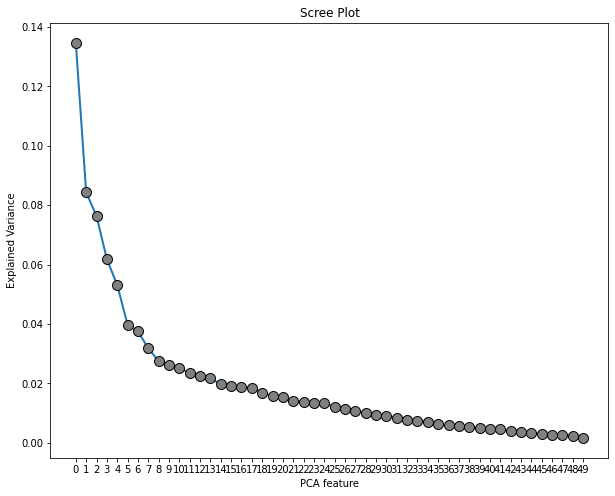

In [62]:
# INSTANTIATING a PCA object with no limit to principal components
pca_regular = PCA(n_components = None,
                  random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled_regular
customer_pca_regular = pca_regular.fit_transform(purchases_scaled_regular)


# calling the scree_plot function
scree_plot(pca_object = pca_regular)

#### b) Reducing the number of principal components(Set the cut-off)

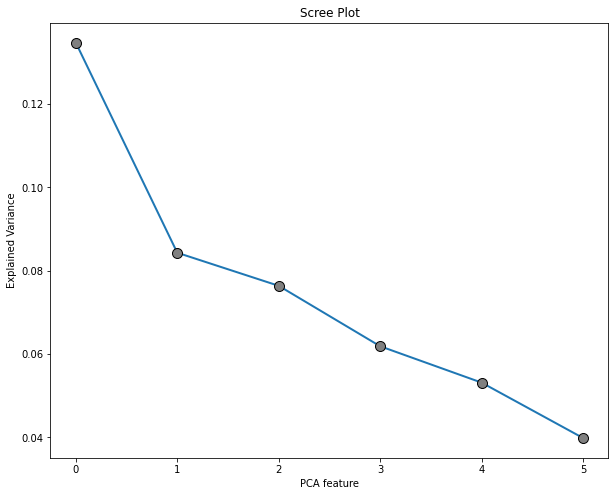

In [63]:
# INSTANTIATING a new model using the first three principal components
pca_final_regular = PCA(n_components=6,
                        random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled_regular
customer_pca_final_regular = pca_final_regular.fit_transform(purchases_scaled_regular)


# calling the scree_plot function
scree_plot(pca_object=pca_final_regular)

In [64]:
########################## UPDATE 6 #####################

##################
### 6 PC Model ###
##################
# transposing pca components (pc = 6)
factor_loadings_regular_6 = pd.DataFrame(pd.np.transpose(pca_final_regular.components_))


# naming rows as original features
factor_loadings_regular_6 = factor_loadings_regular_6.set_index(purchases_scaled_regular.columns)


# checking the results
print(f"""
 6 Components Factor Loadings
------------------------------
{factor_loadings_regular_6.round(2)}
""")


 6 Components Factor Loadings
------------------------------
                              0     1     2     3     4     5
q1_life_party             -0.06  0.25 -0.16 -0.08  0.02  0.24
q2_little_concern_others   0.13  0.01 -0.16  0.10  0.12  0.18
q3_always_prepared        -0.09  0.03  0.02  0.17 -0.02  0.38
q4_stressed_easily         0.07  0.20  0.22 -0.04 -0.21 -0.19
q5_rich_vocabulary        -0.16  0.02  0.00  0.20  0.07 -0.02
q6_dont_talk               0.12 -0.15  0.19  0.02  0.23  0.02
q7_interested_people      -0.16  0.15  0.01 -0.18  0.11 -0.04
q8_leave_belongings        0.07  0.14 -0.11 -0.04  0.26 -0.03
q9_relaxed_most_time      -0.02 -0.06 -0.16  0.04  0.35  0.08
q10_difficult_abstract     0.09  0.07  0.06 -0.33 -0.06  0.15
q11_comfortable_people    -0.22  0.06 -0.21 -0.18  0.04  0.01
q12_insult_people          0.15  0.09 -0.15  0.08 -0.01  0.08
q13_attention_details     -0.15 -0.10  0.25  0.04 -0.05  0.08
q14_worry_things           0.01  0.13  0.27 -0.08 -0.12 -0.08
q15_vivi

/Users/vinicius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


#### c) Naming principal components & Analyzing for each customer

In [65]:
# naming each principal component
factor_loadings_regular_6.columns = ['Old-school Mathematician',        # Low social interaction and creativity / Rational
                                     'Solo-Musician',                   # Emotional / Extrovert / Sef-centric
                                     'Scientist',                       # Introvert / Perfectionist / Overthinking
                                     'Marketeer','Messy','Organized']   # Creative / Smart


# analyzing factor strengths per customer
X_pca_reduced_regular = pca_final_regular.transform(purchases_scaled_regular)


# converting to a DataFrame
X_pca_df_regular = pd.DataFrame(X_pca_reduced_regular)


# renaming columns
X_pca_df_regular.columns = factor_loadings_regular_6.columns


# checking the results
X_pca_df_regular

,Old-school Mathematician,Solo-Musician,Scientist,Marketeer,Messy,Organized
0,0.378906,-0.295999,0.554136,0.063557,-1.269932,0.982780
1,0.846973,-0.389374,1.667600,1.974866,1.230088,0.451295
2,2.029460,-2.323655,-4.465777,2.425978,-0.874722,3.268527
3,0.196868,2.785554,1.452786,-0.998149,2.972555,0.583943
4,3.741779,2.346468,-0.550219,-0.229365,0.407846,1.544787
5,4.181206,1.451657,2.116720,-1.477798,-0.022066,-2.234622
6,2.751803,1.432164,1.202091,0.174784,-0.516368,-0.792875
7,-2.810369,-0.998312,-2.252868,-0.062527,-0.672068,-0.224611
8,1.941461,-1.664474,0.049385,-0.147928,-0.717678,0.239149
9,-2.940773,-1.670543,0.229513,1.834970,-1.959433,0.775535


### 2.2 Agglomerative Clustering - Regular(Big 5 personality)
#### a) scaled version of the factor loading

In [66]:
# checking variance amongst clusters
np.var(X_pca_df_regular)

Old-school Mathematician    6.734829
Solo-Musician               4.214496
Scientist                   3.817634
Marketeer                   3.092474
Messy                       2.655935
Organized                   1.991163
dtype: float64

In [67]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df_regular)


# TRANSFORMING our data after fit
X_scaled_pca_regular = scaler.transform(X_pca_df_regular)


# converting scaled data into a DataFrame
pca_scaled_regular = pd.DataFrame(X_scaled_pca_regular)


# reattaching column names
pca_scaled_regular.columns = ['Old-school Mathematician',       
                                     'Solo-Musician',                   
                                     'Scientist', 
                                     'Marketeer','Messy','Organized']


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df_regular), '\n\n')
print(pd.np.var(pca_scaled_regular))

Old-school Mathematician    6.734829
Solo-Musician               4.214496
Scientist                   3.817634
Marketeer                   3.092474
Messy                       2.655935
Organized                   1.991163
dtype: float64 


Old-school Mathematician    1.0
Solo-Musician               1.0
Scientist                   1.0
Marketeer                   1.0
Messy                       1.0
Organized                   1.0
dtype: float64


/Users/vinicius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/vinicius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


#### b) plotting Dendrogram & Inertia plot

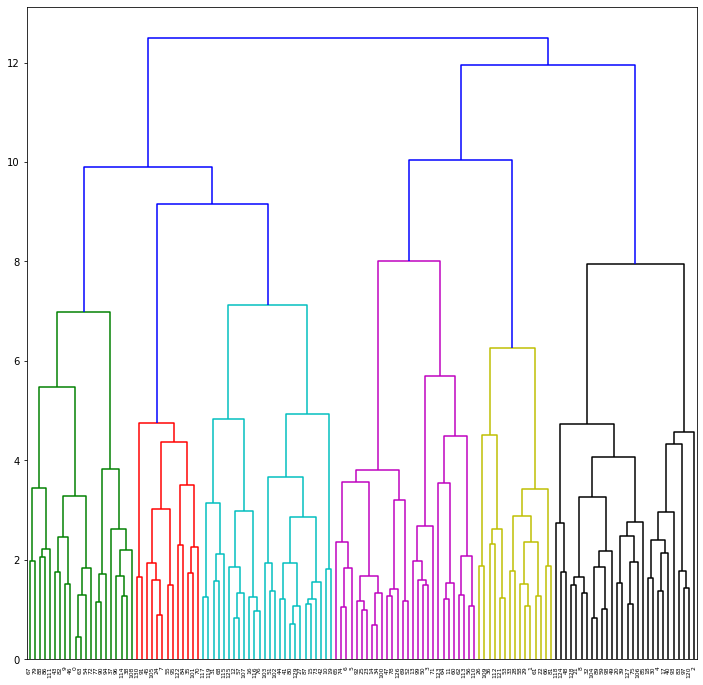

In [68]:
# grouping data based on Ward distance
standard_mergings_ward_regular = linkage(y = pca_scaled_regular,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward_regular,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.show()

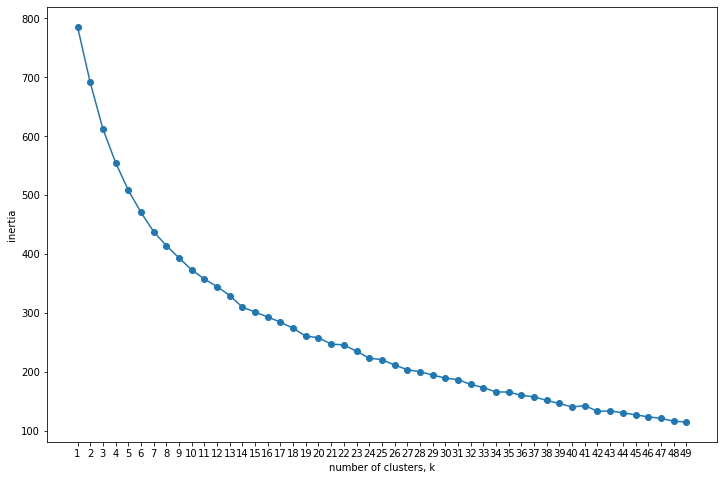

In [69]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled_regular)

#### c) k-Means model & display the centroids for each cluster

In [70]:
# INSTANTIATING a k-Means object with five clusters

customers_k_pca_regular = KMeans(n_clusters = 5,
                                 random_state = 219)


# fitting the object to the data
customers_k_pca_regular.fit(pca_scaled_regular)


# converting the clusters to a DataFrame
customers_kmeans_pca_regular = pd.DataFrame({'Cluster': customers_k_pca_regular.labels_})


# checking the results
print(customers_kmeans_pca_regular.iloc[: , 0].value_counts())

3    38
4    31
2    28
0    20
1    14
Name: Cluster, dtype: int64


In [71]:
# storing cluster centers
centroids_pca_regular = customers_k_pca_regular.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df_regular = pd.DataFrame(centroids_pca_regular)


# renaming principal components
centroids_pca_df_regular.columns = ['Old-school Mathematician',        
                                     'Solo-Musician',                  
                                     'Scientist', 
                                     'Marketeer','Messy','Organized']


# checking results (clusters = rows, pc = columns)
centroids_pca_df_regular.round(2)

,Old-school Mathematician,Solo-Musician,Scientist,Marketeer,Messy,Organized
0,0.01,-0.74,0.91,1.01,0.87,-0.32
1,-0.17,0.99,-0.62,1.09,-0.89,-0.43
2,-0.11,0.84,-0.38,-0.40,1.06,0.27
3,-0.36,-0.73,-0.52,-0.16,-0.43,0.40
4,0.61,0.17,0.68,-0.59,-0.60,-0.33


#### d) PCA components with categorical data

In [72]:
############################################
######## Regular behavior model ############
############################################

# concatenating cluster with principal components
clst_pca_regualar_df = pd.concat([customers_kmeans_pca_regular,
                                  X_pca_df_regular],
                                  axis = 1)


# checking results
clst_pca_regualar_df

#Reseting index
survey_df=survey_df.reset_index(drop=True)

# concatenating demographic information with pca-clusters
final_regular_pca_clust_df = pd.concat([survey_df.loc[ : , ['current_laptop',
                                                            'next_laptop',
                                                            'switch',
                                                            'program',
                                                            'gender',
                                                            'age',
                                                            'continent']],
                                        clst_pca_regualar_df],
                                        axis = 1)


# renaming columns
final_regular_pca_clust_df.columns = ['current_laptop',
                                      'next_laptop',
                                      'switch', 
                                      'program',
                                      'gender','age',
                                      'continent',
                                      'cluster',
                                      'Old-school Mathematician',        
                                      'Solo-Musician',                  
                                      'Scientist', 
                                      'Marketeer','Messy','Organized']

In [73]:
# renaming
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}

final_regular_pca_clust_df['cluster'].replace(cluster_names, inplace = True)

# adding a productivity step
regular_data_df = final_regular_pca_clust_df


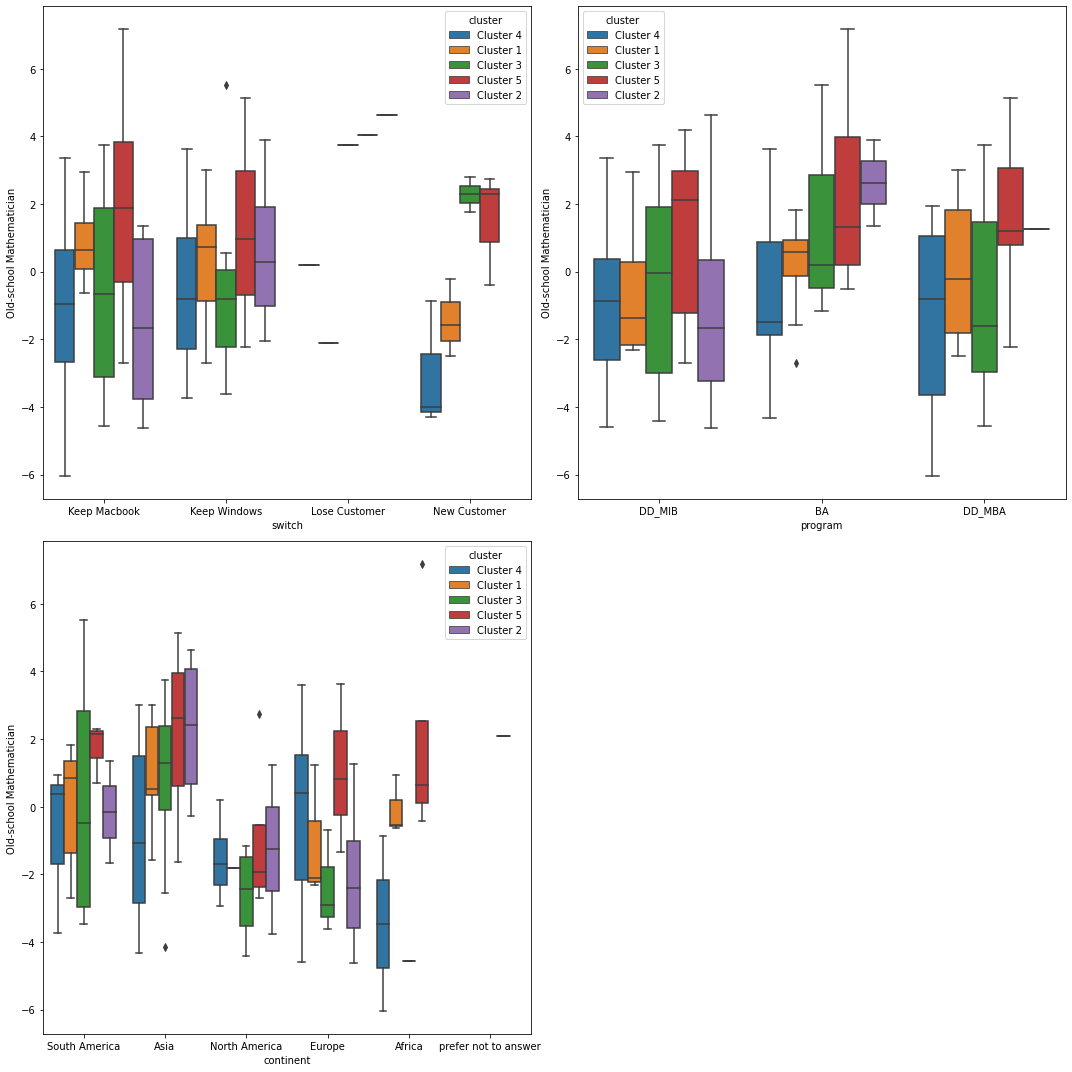

In [74]:
########################
# Old-school Mathematician
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 15))

# switch
plt.subplot(2, 2, 1)

sns.boxplot(x = 'switch',
            y = 'Old-school Mathematician',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# program
plt.subplot(2, 2, 2)

sns.boxplot(x = 'program',
            y = 'Old-school Mathematician',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# nationality
plt.subplot(2, 2, 3)

sns.boxplot(x = 'continent',
            y = 'Old-school Mathematician',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------

# formatting and displaying the plot
plt.tight_layout()
plt.show()

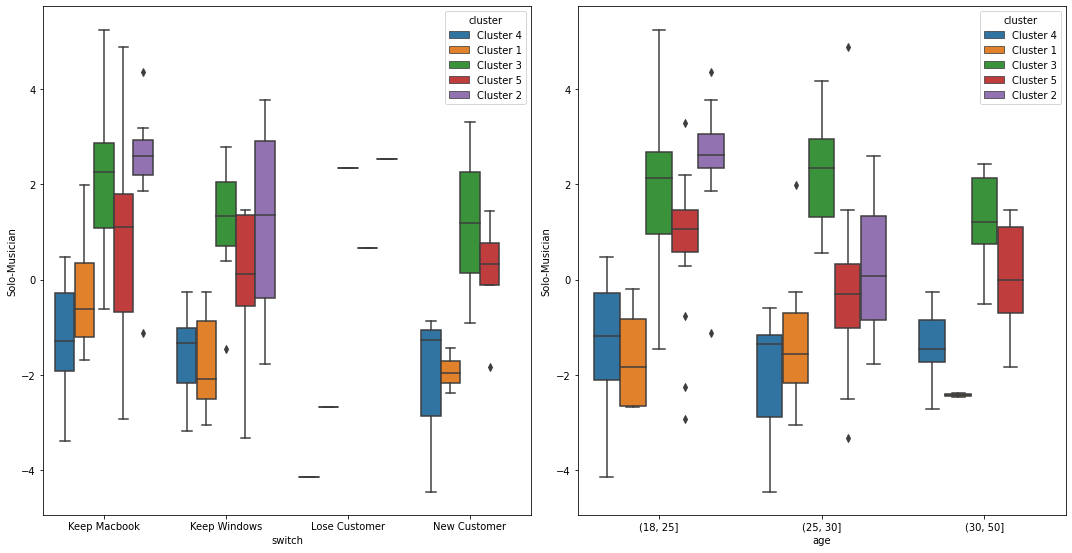

In [75]:
########################
# Solo-Musician
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 15))

# switch
plt.subplot(2, 2, 1)

sns.boxplot(x = 'switch',
            y = 'Solo-Musician',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# age
plt.subplot(2, 2, 2)

sns.boxplot(x = 'age',
            y = 'Solo-Musician',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------

# formatting and displaying the plot
plt.tight_layout()
plt.show()

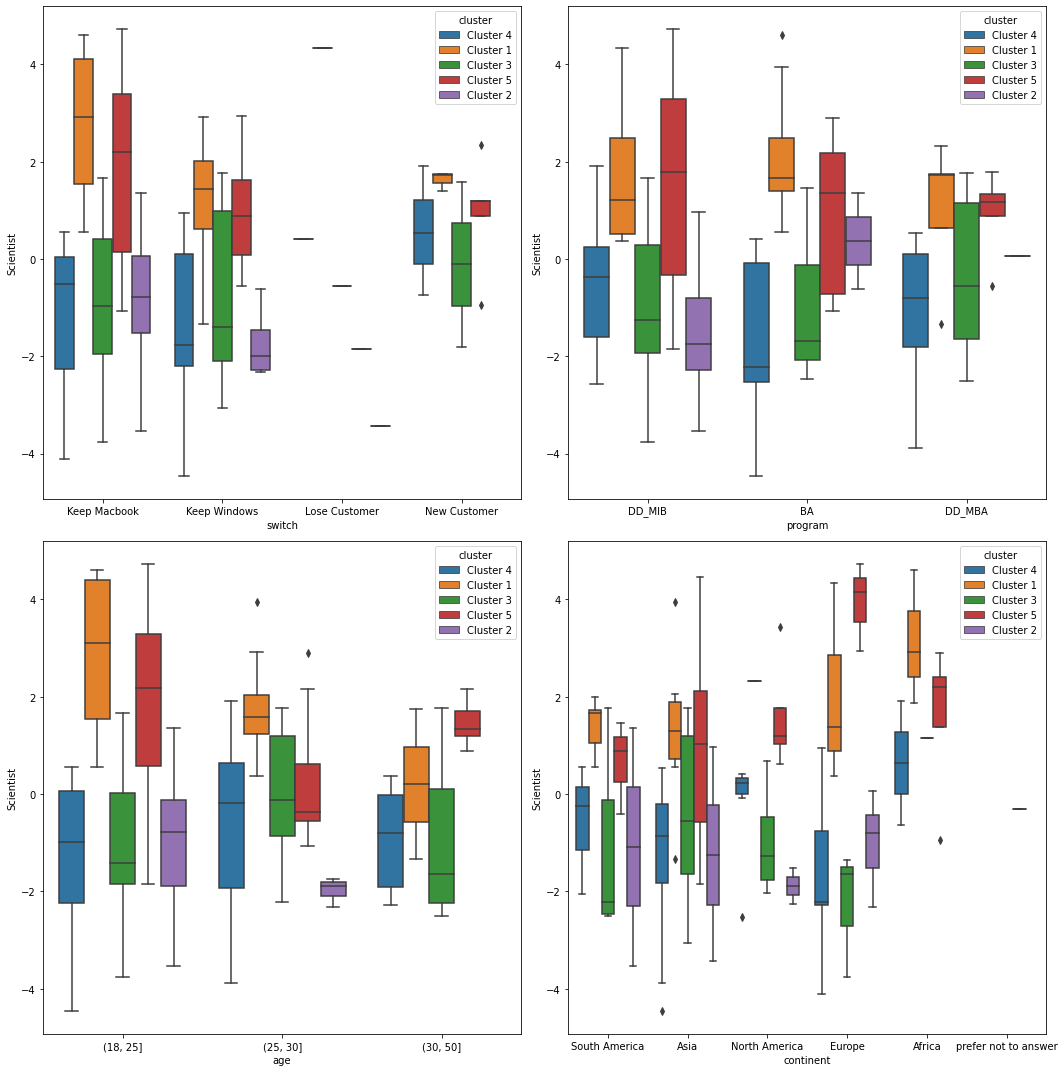

In [76]:
########################
# Scientist
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 15))

# switch
plt.subplot(2, 2, 1)

sns.boxplot(x = 'switch',
            y = 'Scientist',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# program
plt.subplot(2, 2, 2)

sns.boxplot(x = 'program',
            y = 'Scientist',
            hue = 'cluster',
            data = regular_data_df)

#-----------------------------------------------
# age
plt.subplot(2, 2, 3)

sns.boxplot(x = 'age',
            y = 'Scientist',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# nationality
plt.subplot(2, 2, 4)

sns.boxplot(x = 'continent',
            y = 'Scientist',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# formatting and displaying the plot
plt.tight_layout()
plt.show()

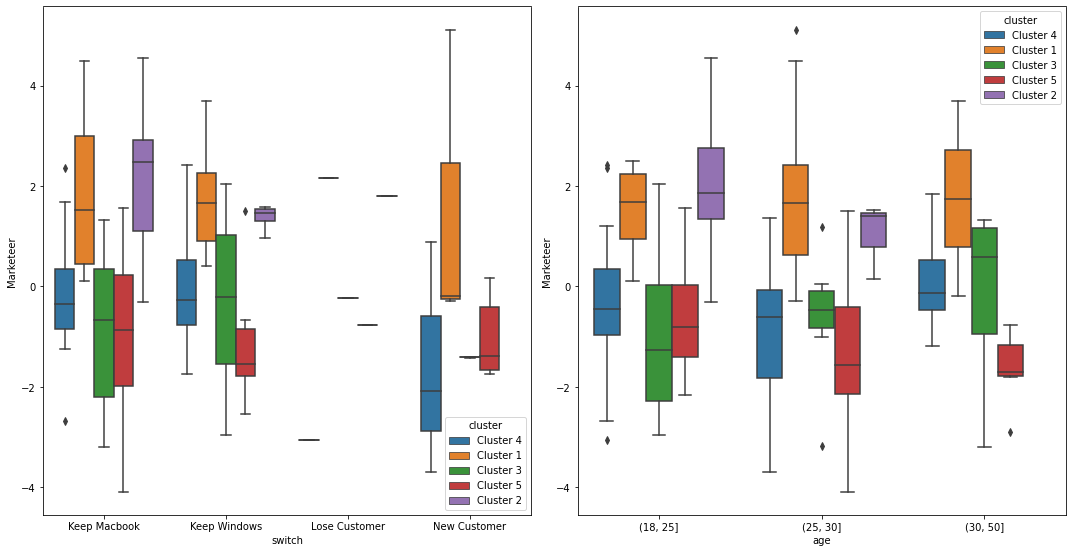

In [77]:
########################
# Marketeer
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 15))

# switch
plt.subplot(2, 2, 1)

sns.boxplot(x = 'switch',
            y = 'Marketeer',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# age
plt.subplot(2, 2, 2)

sns.boxplot(x = 'age',
            y = 'Marketeer',
            hue = 'cluster',
            data = regular_data_df)

#-------------------------------------------
# formatting and displaying the plot
plt.tight_layout()
plt.show()


## 3. Hult DNA

### 3.1 Principal Component Analysis : Hult

In [78]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(purchase_behavior_hult)


# TRANSFORMING our data after fit
X_scaled_hult = scaler.transform(purchase_behavior_hult)


# converting scaled data into a DataFrame
purchases_scaled_hult = pd.DataFrame(X_scaled_hult)


# reattaching column names
purchases_scaled_hult.columns = purchase_behavior_hult.columns


#### a) scaled version of the factor loading

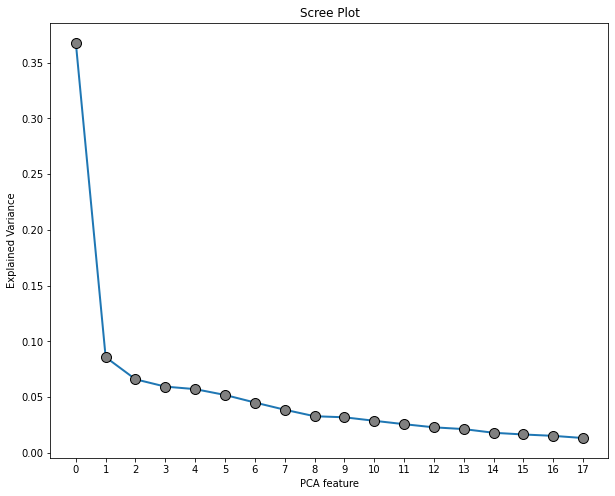

In [79]:
# INSTANTIATING a PCA object with no limit to principal components
pca_hult = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_hult = pca_hult.fit_transform(purchases_scaled_hult)


# calling the scree_plot function
scree_plot(pca_object = pca_hult)

#### b) Reducing the number of principal components(Set the cut-off)

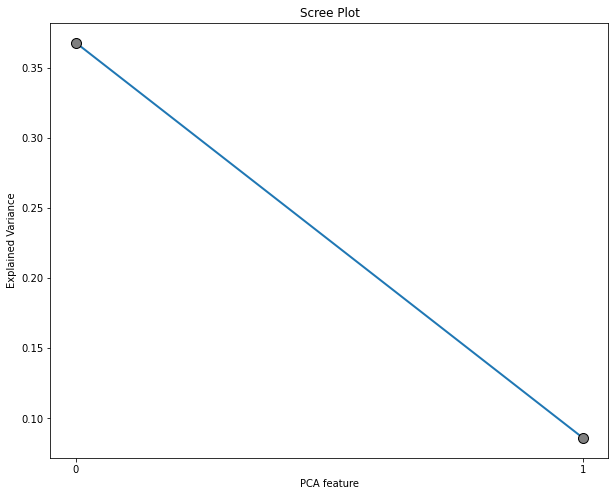

In [80]:
# INSTANTIATING a new model using the first 2 principal components
pca_final_hult = PCA(n_components=2,
                     random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_final_hult = pca_final_hult.fit_transform(purchases_scaled_hult)


# calling the scree_plot function
scree_plot(pca_object=pca_final_hult)

In [81]:
########################## UPDATE 2 #####################

##################
### 2 PC Model ###
##################
# transposing pca components (pc = 2)
factor_loadings_hult_2 = pd.DataFrame(pd.np.transpose(pca_final_hult.components_))


# naming rows as original features
factor_loadings_hult_2 = factor_loadings_hult_2.set_index(purchases_scaled_hult.columns)


# checking the results
print(f"""

2 Components Factor Loadings
------------------------------
{factor_loadings_hult_2.round(2)}
""")



2 Components Factor Loadings
------------------------------
                                   0     1
h1_patterns_complex_situations -0.24  0.21
h2_dont_generate_new_ideas      0.11 -0.38
h3_demonstrate_awareness       -0.23 -0.11
h4_growth_mindset              -0.26 -0.03
h5_respond_priorities          -0.28  0.03
h6_take initiative             -0.27  0.12
h7_encourage_discussions       -0.28  0.10
h11_listen_carefully           -0.20 -0.39
h12_dont_sell_idea              0.08 -0.57
h13_build_relationships        -0.26 -0.16
h14_work_diverse_cultures      -0.27 -0.16
h15_negotiate_interests        -0.26 -0.01
h16_cant_rally_people           0.08 -0.33
h17_translate_ideas_plans      -0.25  0.16
h18_resolve_conflicts          -0.30 -0.13
h19_use_feedback               -0.20 -0.30
h20_coach_teanmates            -0.27  0.01
h21_drive_results              -0.24  0.10



/Users/vinicius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


#### c) Naming principal components & Analyzing for each customer

In [82]:
# naming each principal component
factor_loadings_hult_2.columns = ['Old-school boss','Elon Musk'] 

# analyzing factor strengths per customer
X_pca_reduced_hult = pca_final_hult.transform(purchases_scaled_hult)


# converting to a DataFrame
X_pca_df_hult = pd.DataFrame(X_pca_reduced_hult)


# renaming columns
X_pca_df_hult.columns = factor_loadings_hult_2.columns


# checking the results
X_pca_df_hult

,Old-school boss,Elon Musk
0,0.059999,0.247293
1,-0.661568,0.131469
2,2.717585,1.653715
3,-2.127035,-2.678256
4,4.071777,-1.268608
5,2.652368,-0.634451
6,-1.269362,-0.542204
7,-0.323353,0.753335
8,0.596202,-0.629172
9,-2.415081,0.404203


### 3.2 Agglomerative Clustering - Hult
#### a) scaled version of the factor loading

In [83]:
# checking variance amongst clusters
np.var(X_pca_df_hult)

Old-school boss    6.622912
Elon Musk          1.545909
dtype: float64

In [84]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df_hult)


# TRANSFORMING our data after fit
X_scaled_pca_hult = scaler.transform(X_pca_df_hult)


# converting scaled data into a DataFrame
pca_scaled_hult = pd.DataFrame(X_scaled_pca_hult)


# reattaching column names
pca_scaled_hult.columns = ['Old-school boss','Elon Musk'] 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df_hult), '\n\n')
print(pd.np.var(pca_scaled_hult))

Old-school boss    6.622912
Elon Musk          1.545909
dtype: float64 


Old-school boss    1.0
Elon Musk          1.0
dtype: float64


/Users/vinicius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/vinicius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


#### b) plotting Dendrogram & Inertia plot

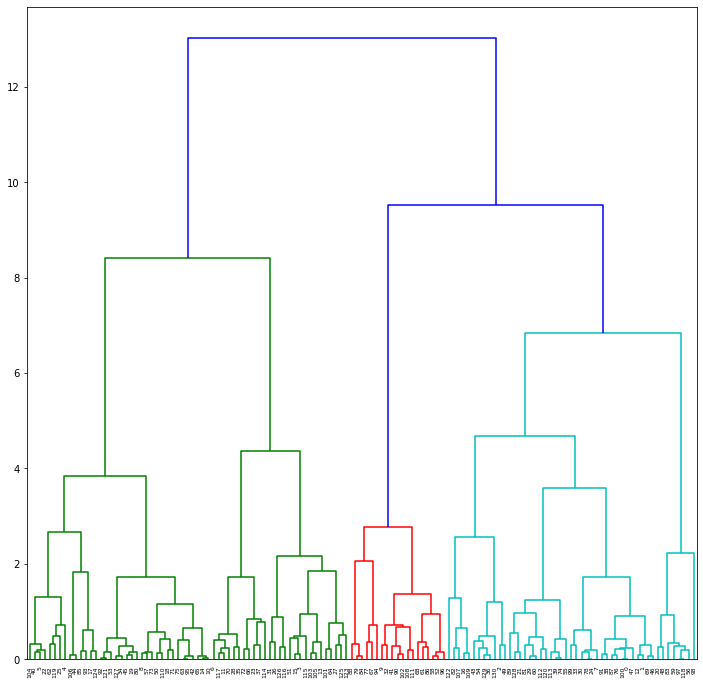

In [85]:
# grouping data based on Ward distance
standard_mergings_ward_hult = linkage(y = pca_scaled_hult,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward_hult,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.show()

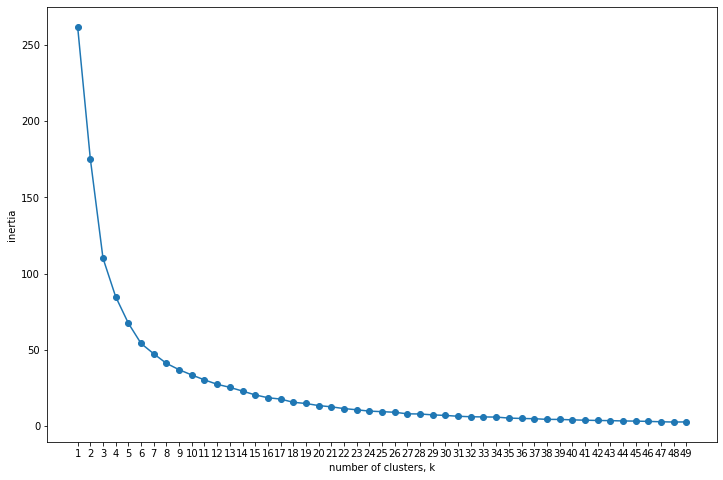

In [86]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled_hult)

#### c) k-Means model & display the centroids for each cluster

In [87]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca_hult = KMeans(n_clusters = 3,
                              random_state = 219)


# fitting the object to the data
customers_k_pca_hult.fit(pca_scaled_hult)


# converting the clusters to a DataFrame
customers_kmeans_pca_hult = pd.DataFrame({'Cluster': customers_k_pca_hult.labels_})


# checking the results
print(customers_kmeans_pca_hult.iloc[: , 0].value_counts())

2    51
1    43
0    37
Name: Cluster, dtype: int64


In [88]:
# storing cluster centers
centroids_pca_hult = customers_k_pca_hult.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df_hult = pd.DataFrame(centroids_pca_hult)


# renaming principal components
centroids_pca_df_hult.columns =  ['Old-school boss','Elon Musk'] 

# checking results (clusters = rows, pc = columns)
centroids_pca_df_hult.round(2)

,Old-school boss,Elon Musk
0,-0.75,-0.89
1,-0.50,0.99
2,0.96,-0.19


#### d) PCA components with categorical data

In [89]:
############################################
######## Hult DNA behavior model ############
############################################

# concatenating cluster memberships with principal components
clst_pca_hult_df = pd.concat([customers_kmeans_pca_hult,
                                  X_pca_df_hult],
                                  axis = 1)


# checking results
clst_pca_hult_df

# concatenating demographic information with pca-clusters
final_hult_pca_clust_df = pd.concat([survey_df.loc[ : , ['current_laptop',
                                                        'next_laptop',
                                                        'switch',
                                                        'program',
                                                        'gender',
                                                        'age',
                                                        'continent']],
                                clst_pca_hult_df],
                                axis = 1)


# renaming columns
final_hult_pca_clust_df.columns = ['current_laptop',
                                   'next_laptop',
                                   'switch',
                                   'program',
                                   'gender',
                                   'age',
                                   'continent',
                                   'cluster',
                                   'Old-school boss','Elon Musk']


In [90]:
# renaming
cluster_names_hult = {0 : 'Cluster 1',
                      1 : 'Cluster 2',
                      2 : 'Cluster 3'}
final_hult_pca_clust_df['cluster'].replace(cluster_names_hult, inplace = True)

# adding a productivity step
hult_data_df = final_hult_pca_clust_df

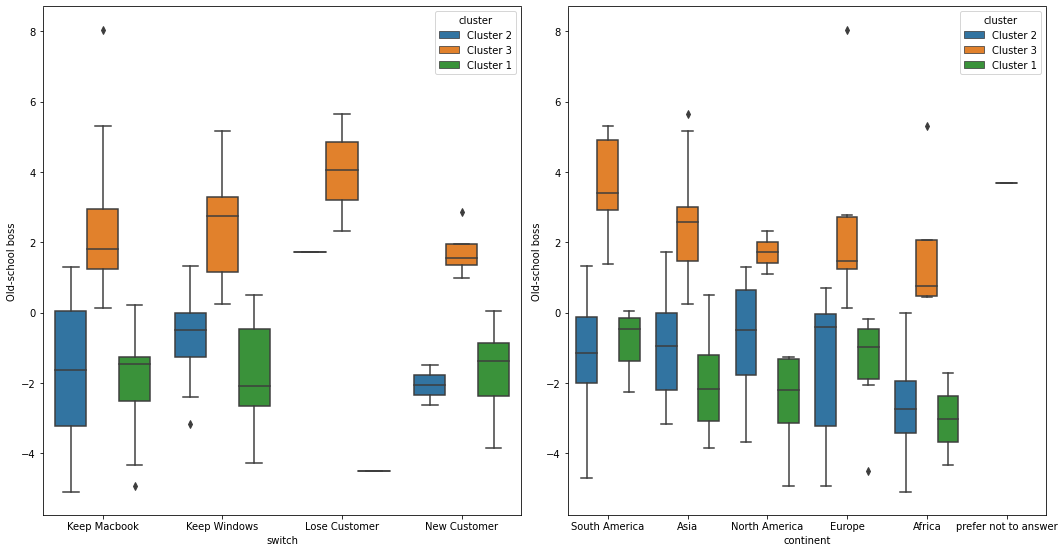

In [91]:
########################
# Old-school boss
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 15))

# Switch
plt.subplot(2, 2, 1)

sns.boxplot(x = 'switch',
            y = 'Old-school boss',
            hue = 'cluster',
            data = hult_data_df)

#-------------------------------------------
# nationality
plt.subplot(2, 2, 2)

sns.boxplot(x = 'continent',
            y = 'Old-school boss',
            hue = 'cluster',
            data = hult_data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()




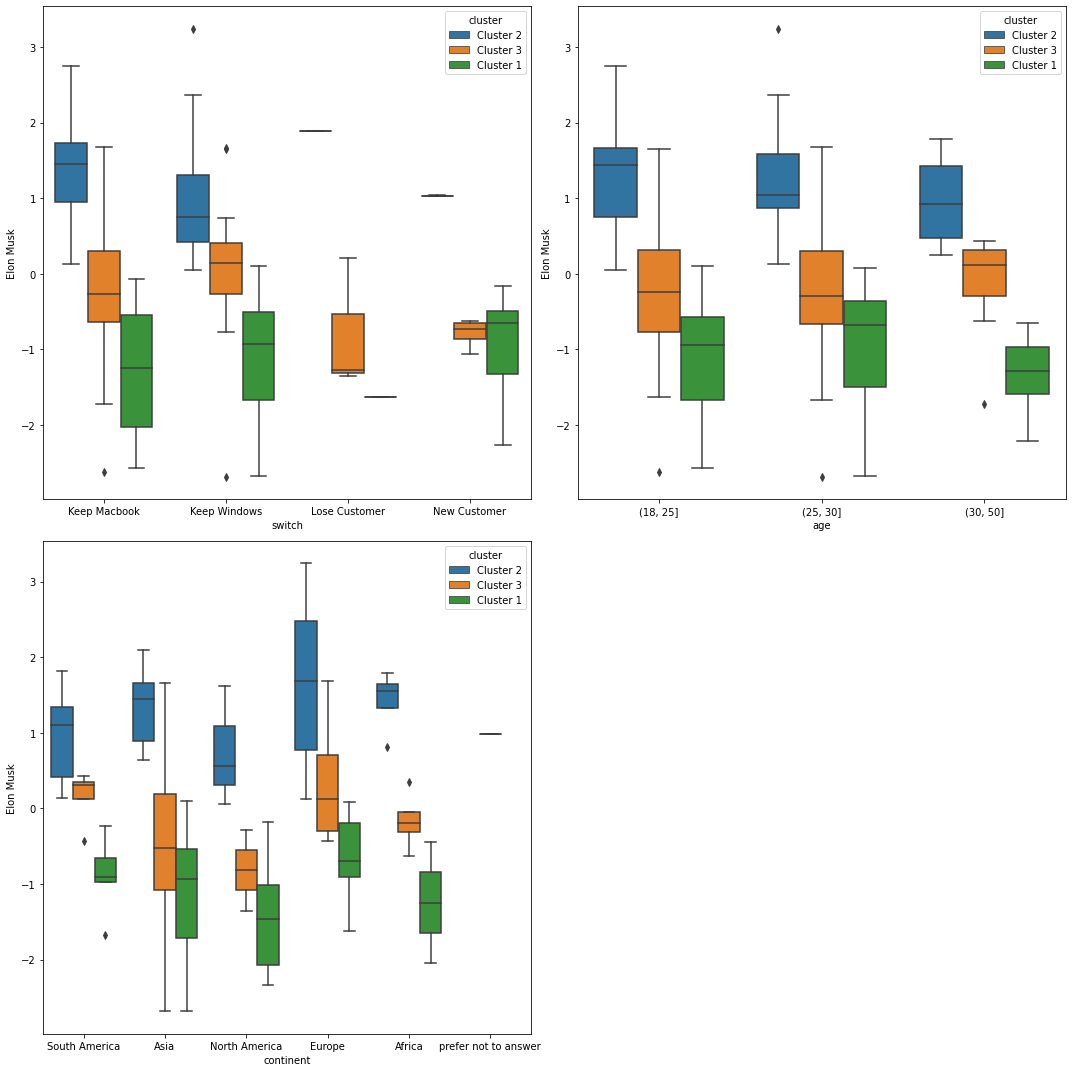

In [92]:
########################
# Elon Musk
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 15))

# switch
plt.subplot(2, 2, 1)

sns.boxplot(x = 'switch',
            y = 'Elon Musk',
            hue = 'cluster',
            data = hult_data_df)

#-------------------------------------------
# age
plt.subplot(2, 2, 2)

sns.boxplot(x = 'age',
            y = 'Elon Musk',
            hue = 'cluster',
            data = hult_data_df)

#-------------------------------------------
# nationality
plt.subplot(2, 2, 3)

sns.boxplot(x = 'continent',
            y = 'Elon Musk',
            hue = 'cluster',
            data = hult_data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()